In [1]:
%load_ext autoreload
%autoreload 

In [2]:
import jupyros as jr
import rospy
import numpy as np
from sensor_msgs import msg
import cv2
import cv_bridge
from copy import deepcopy
import ipywidgets as widgets
import PIL.Image
from cStringIO import StringIO
import matplotlib.pyplot as plt
import dvrk
import PyKDL
import tf
import time
from tf_conversions import posemath
import utils

In [3]:
rospy.init_node('notebook')
rospy.get_published_topics()

[['/dvrk/setup_joint/robot_state', 'std_msgs/String'],
 ['/dvrk/PSM1/current_state', 'std_msgs/String'],
 ['/dvrk/ECM/wrench_body_current', 'geometry_msgs/WrenchStamped'],
 ['/dvrk/PSM2/position_cartesian_local_current', 'geometry_msgs/PoseStamped'],
 ['/dvrk/console/teleop/scale', 'std_msgs/Float32'],
 ['/dvrk/console/teleop/teleop_psm_selected', 'diagnostic_msgs/KeyValue'],
 ['/dvrk/PSM2/joint_velocity_ratio', 'std_msgs/Float64'],
 ['/dvrk/ECM/state_joint_desired', 'sensor_msgs/JointState'],
 ['/dvrk/console/teleop/teleop_psm_unselected', 'diagnostic_msgs/KeyValue'],
 ['/dvrk/PSM2/position_cartesian_desired', 'geometry_msgs/PoseStamped'],
 ['/dvrk/ECM/position_cartesian_local_current', 'geometry_msgs/PoseStamped'],
 ['/dvrk/PSM1/status', 'std_msgs/String'],
 ['/dvrk/ECM/position_cartesian_desired', 'geometry_msgs/PoseStamped'],
 ['/dvrk/tf_broadcast/period_statistics', 'cisst_msgs/mtsIntervalStatistics'],
 ['/dvrk/PSM1/joint_velocity_ratio', 'std_msgs/Float64'],
 ['/dvrk/PSM1/desired

In [4]:
bridge = cv_bridge.CvBridge()
left_image = None
left_image_msg = None
left_camera_info = None

right_image = None
right_image_msg = None
right_camera_info = None

def left_image_callback(im_msg):
    global left_image, left_image_msg
    left_image = bridge.imgmsg_to_cv2(im_msg, desired_encoding='rgb8')
    left_image_msg = im_msg
    
def right_image_callback(im_msg):
    global right_image, right_image_msg
    right_image = bridge.imgmsg_to_cv2(im_msg, desired_encoding='rgb8')
    right_image_msg = im_msg
    
def left_camera_info_callback(camera_info_msg):
    global left_camera_info
    left_camera_info = camera_info_msg
    
def right_camera_info_callback(camera_info_msg):
    global right_camera_info
    right_camera_info = camera_info_msg
    
jr.subscribe('/stereo/left/image_raw', msg.Image, left_image_callback)
jr.subscribe('/stereo/left/camera_info', msg.CameraInfo, left_camera_info_callback)
jr.subscribe('/stereo/right/image_raw', msg.Image, right_image_callback)
jr.subscribe('/stereo/right/camera_info', msg.CameraInfo, right_camera_info_callback)

while left_image is None or right_image is None:
    print("left or right image not receieved")
    time.sleep(0.5)
    

left or right image not receieved


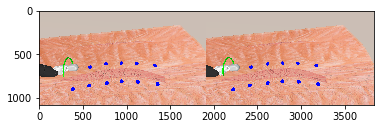

In [5]:
plt.imshow(np.hstack((left_image, right_image)))

In [6]:
tf_listener = tf.TransformListener()
time.sleep(1)
tf_listener.getFrameStrings()

/opt/ros/melodic/lib/python2.7/dist-packages/tf/listener.py:97: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(self._buffer.all_frames_as_yaml()) or {}


['ECM_RCM',
 'PSM1_clip',
 'ECM',
 'PSM2_base',
 'simcamera',
 'PSM1_RCM',
 'PSM1_base',
 'PSM2_RCM',
 'PSM1',
 'PSM2',
 'ECM_base',
 'PSM2_clip']

In [7]:
psm1 = dvrk.psm('PSM1')
psm2 = dvrk.psm('PSM2')
ecm = dvrk.ecm('ECM')
while ecm.get_current_position() == PyKDL.Frame() or ecm.get_desired_position() == PyKDL.Frame():
    time.sleep(0.5)
while psm1.get_current_position() == PyKDL.Frame() or psm1.get_desired_position() == PyKDL.Frame():
    time.sleep(0.5)

In [8]:
# ECM_STARTING_JOINT_POS = np.asarray([-0.15669435,  0.17855662,  0.07069676,  0.17411496])
# ECM_STARTING_JOINT_POS = np.asarray([0.0615668 , 0.0523214 , 0.04854392, 0.15809197])
# ECM_STARTING_JOINT_POS = np.asarray([-0.14478268, -0.1293848 ,  0.00261061,  0.043541  ])
ECM_STARTING_JOINT_POS = np.asarray([0, 0 ,  0.05,  0.043541  ])
ecm.move_joint(ECM_STARTING_JOINT_POS)

True

In [9]:
time.sleep(1)
PSM_HOME_POS = np.asarray([0., 0., 0.05, 0., 0., 0.])
psm1.move_joint(PSM_HOME_POS)
psm1.close_jaw()

psm2.move_joint(PSM_HOME_POS)
psm2.close_jaw()

True

[ 0.03685897 -0.02320513  0.10665311]
[    0.036859,  -0.0232051,    0.106653]
[ 0.02512987 -0.02058442  0.10803822]
[   0.0251299,  -0.0205844,    0.108038]
[-0.02551282 -0.01929487  0.10665311]
[  -0.0255128,  -0.0192949,    0.106653]
[ 0.01188312 -0.01876623  0.10803822]
[   0.0118831,  -0.0187662,    0.108038]
[-0.01123377 -0.01779221  0.10803822]
[  -0.0112338,  -0.0177922,    0.108038]
[ 0.00098684 -0.01769737  0.10945977]
[ 0.000986842,  -0.0176974,     0.10946]
[ 0.03847222 -0.009375    0.11554087]
[   0.0384722,   -0.009375,    0.115541]
[ 0.02625    -0.0075      0.11554087]
[     0.02625,     -0.0075,    0.115541]
[-0.02520548 -0.00616438  0.11395812]
[  -0.0252055, -0.00616438,    0.113958]
[ 0.01319444 -0.00493056  0.11554087]
[   0.0131944, -0.00493056,    0.115541]
[-0.01104167 -0.00465278  0.11554087]
[  -0.0110417, -0.00465278,    0.115541]
[ 0.00119718 -0.00443662  0.11716821]
[  0.00119718, -0.00443662,    0.117168]


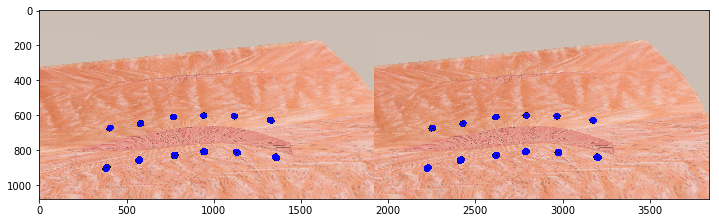

In [10]:
import image_geometry
utils = None
import utils
stereo_model = image_geometry.StereoCameraModel()
stereo_model.fromCameraInfo(left_camera_info, right_camera_info)

tf_cam_to_world = utils.tf_to_pykdl_frame(tf_listener.lookupTransform('simworld', 'simcamera', rospy.Time()))
tf_world_to_psm1 = \
    utils.tf_to_pykdl_frame(tf_listener.lookupTransform('PSM1_base', 'simworld', rospy.Time()))
tf_world_to_psm2 = \
    utils.tf_to_pykdl_frame(tf_listener.lookupTransform('PSM2_base', 'simworld', rospy.Time()))

objects, frame = utils.get_points_and_img(left_image_msg, right_image_msg, stereo_model, tf_cam_to_world)
plt.figure(figsize=(12, 5))
plt.imshow(frame)
for o in objects:
    o = PyKDL.Vector(o.x(), o.y(), o.z())
#     o = PyKDL.Vector(o.x(), o.y(), o.z())

In [11]:
len(objects)

12

In [12]:
# pair up points that are across from each other
# x is *more or less* the axis along the wound
paired_pts = []
while objects:
    pt = objects[0]
    objects.remove(pt)
#     pt2 = min(objects, key=lambda obj : abs(obj.x() - pt.x()))
    pt2 = min(objects, key=lambda obj : abs(obj.y() - pt.y()))
    objects.remove(pt2)
#     paired_pts.append(
#         (max(pt, pt2, key=lambda p: p.y()), min(pt, pt2, key=lambda p: p.y())))
    paired_pts.append(
        (max(pt, pt2, key=lambda p: p.x()), min(pt, pt2, key=lambda p: p.x())))
print(paired_pts[0][0][1])
print(paired_pts[1][0][1])
paired_pts = sorted(paired_pts,key=lambda p: float(p[0][1]))
print("paired points sorted:")
paired_pts

0.0453214693704
0.032998296038
paired points sorted:


[([    -1.51536,  -0.0183709,    0.668699],
  [    -1.53037,  -0.0175627,    0.668292]),
 ([    -1.51222, -0.00439262,    0.668364],
  [    -1.52732, -0.00346448,    0.668124]),
 ([     -1.5103,   0.0077594,    0.667295],
  [    -1.52561,  0.00868269,    0.667171]),
 ([    -1.51067,   0.0197937,    0.668661],
  [    -1.52645,   0.0196565,    0.668047]),
 ([    -1.51191,   0.0329983,    0.667589],
  [    -1.52703,   0.0329971,    0.667361]),
 ([    -1.51262,   0.0453215,    0.666856],
  [    -1.52912,   0.0449132,     0.66743])]

In [13]:
import suturing_state_machine_single_needle
reload(suturing_state_machine_single_needle)
reload(utils)

pts_psm1 = paired_pts[:3]
pts_psm2 = paired_pts[3:]
# pts_psm2 = []

# for sublist in (paired_pts[3:]):
#     pts_psm2.append(sublist[::-1])

sm = suturing_state_machine_single_needle.SuturingStateMachine(psm1, psm2, tf_world_to_psm1,tf_world_to_psm2,  paired_pts )  

while not sm.is_done():
    sm.run_once()
    time.sleep(0.1)

[INFO] [1602530061.506906]: Executing state SuturingState.PREPARE_INSERTION
[INFO] [1602530061.519468]: Distance from arm to dest: 0.173920099996
[INFO] [1602530061.639348]: Executing state SuturingState.PREPARE_INSERTION
[INFO] [1602530061.644177]: Distance from arm to dest: 0.171985263552
[INFO] [1602530061.750695]: Executing state SuturingState.PREPARE_INSERTION
[INFO] [1602530061.784616]: Distance from arm to dest: 0.166587804391
[INFO] [1602530061.923078]: Executing state SuturingState.PREPARE_INSERTION
[INFO] [1602530061.925190]: Distance from arm to dest: 0.157659855328
[INFO] [1602530062.035826]: Executing state SuturingState.PREPARE_INSERTION
[INFO] [1602530062.082375]: Distance from arm to dest: 0.144068204737
[INFO] [1602530062.224705]: Executing state SuturingState.PREPARE_INSERTION
[INFO] [1602530062.228081]: Distance from arm to dest: 0.127838465766
[INFO] [1602530062.338594]: Executing state SuturingState.PREPARE_INSERTION
[INFO] [1602530062.340508]: Distance from arm to

[INFO] [1602530067.325335]: Moving to pose 28 out of 34
[INFO] [1602530067.385662]: Executing state SuturingState.INSERTION
[INFO] [1602530067.521074]: Moving to pose 29 out of 34
[INFO] [1602530067.532284]: Executing state SuturingState.INSERTION
[INFO] [1602530067.642384]: Moving to pose 30 out of 34
[INFO] [1602530067.645037]: Executing state SuturingState.INSERTION
[INFO] [1602530067.796035]: Moving to pose 31 out of 34
[INFO] [1602530067.845338]: Executing state SuturingState.INSERTION
[INFO] [1602530067.957071]: Moving to pose 32 out of 34
[INFO] [1602530067.966626]: Executing state SuturingState.INSERTION
[INFO] [1602530068.075428]: Moving to pose 33 out of 34
[INFO] [1602530068.078177]: Executing state SuturingState.INSERTION
[INFO] [1602530068.180380]: Moving to pose 34 out of 34
[INFO] [1602530068.188526]: Executing state SuturingState.INSERTION
[INFO] [1602530068.291963]: Moving to pose 34 out of 34
[INFO] [1602530068.309915]: Executing state SuturingState.INSERTION
[INFO] [

[INFO] [1602530076.674363]: Moving to pose 32 out of 32
[INFO] [1602530076.685850]: Executing state SuturingState.EXTRACTION
[INFO] [1602530076.797337]: Moving to pose 32 out of 32
[INFO] [1602530076.809700]: Executing state SuturingState.EXTRACTION
[INFO] [1602530076.982796]: Executing state SuturingState.RELEASE_NEEDLE_PSM1
[INFO] [1602530077.102081]: Executing state SuturingState.RELEASE_NEEDLE_PSM1
[INFO] [1602530077.212389]: Executing state SuturingState.RELEASE_NEEDLE_PSM1
[INFO] [1602530077.330638]: Executing state SuturingState.RELEASE_NEEDLE_PSM1
[INFO] [1602530077.436924]: Executing state SuturingState.RELEASE_NEEDLE_PSM1
[INFO] [1602530077.549172]: Executing state SuturingState.RELEASE_NEEDLE_PSM1
circle_center=[    -1.52268, -0.00996826,    0.677248], circle_radius=0.0117
[INFO] [1602530077.718320]: Executing state SuturingState.PICKUP
[INFO] [1602530077.736315]: Distance from arm to dest: 0.173450908015
[INFO] [1602530077.843674]: Executing state SuturingState.PICKUP
[INFO

[INFO] [1602530083.568110]: Moving to pose 16 out of 34
[INFO] [1602530083.574344]: Executing state SuturingState.INSERTION
[INFO] [1602530083.677343]: Moving to pose 17 out of 34
[INFO] [1602530083.697581]: Executing state SuturingState.INSERTION
[INFO] [1602530083.807299]: Moving to pose 18 out of 34
[INFO] [1602530083.809288]: Executing state SuturingState.INSERTION
[INFO] [1602530083.920812]: Moving to pose 19 out of 34
[INFO] [1602530083.928218]: Executing state SuturingState.INSERTION
[INFO] [1602530084.030562]: Moving to pose 20 out of 34
[INFO] [1602530084.051964]: Executing state SuturingState.INSERTION
[INFO] [1602530084.168710]: Moving to pose 21 out of 34
[INFO] [1602530084.172847]: Executing state SuturingState.INSERTION
[INFO] [1602530084.304490]: Moving to pose 22 out of 34
[INFO] [1602530084.312383]: Executing state SuturingState.INSERTION
[INFO] [1602530084.416181]: Moving to pose 23 out of 34
[INFO] [1602530084.423631]: Executing state SuturingState.INSERTION
[INFO] [

[INFO] [1602530092.113115]: Moving to pose 21 out of 32
[INFO] [1602530092.156350]: Executing state SuturingState.EXTRACTION
[INFO] [1602530092.286355]: Moving to pose 22 out of 32
[INFO] [1602530092.295414]: Executing state SuturingState.EXTRACTION
[INFO] [1602530092.418181]: Moving to pose 23 out of 32
[INFO] [1602530092.427313]: Executing state SuturingState.EXTRACTION
[INFO] [1602530092.529505]: Moving to pose 24 out of 32
[INFO] [1602530092.539676]: Executing state SuturingState.EXTRACTION
[INFO] [1602530092.649854]: Moving to pose 25 out of 32
[INFO] [1602530092.659142]: Executing state SuturingState.EXTRACTION
[INFO] [1602530092.768091]: Moving to pose 26 out of 32
[INFO] [1602530092.792994]: Executing state SuturingState.EXTRACTION
[INFO] [1602530092.913642]: Moving to pose 27 out of 32
[INFO] [1602530092.933586]: Executing state SuturingState.EXTRACTION
[INFO] [1602530093.045381]: Moving to pose 28 out of 32
[INFO] [1602530093.054778]: Executing state SuturingState.EXTRACTION


[INFO] [1602530098.582738]: Moving to pose 4 out of 34
[INFO] [1602530098.592553]: Executing state SuturingState.INSERTION
[INFO] [1602530098.694755]: Moving to pose 5 out of 34
[INFO] [1602530098.705123]: Executing state SuturingState.INSERTION
[INFO] [1602530098.846304]: Moving to pose 6 out of 34
[INFO] [1602530098.888494]: Executing state SuturingState.INSERTION
[INFO] [1602530098.999067]: Moving to pose 7 out of 34
[INFO] [1602530099.009156]: Executing state SuturingState.INSERTION
[INFO] [1602530099.119798]: Moving to pose 8 out of 34
[INFO] [1602530099.129309]: Executing state SuturingState.INSERTION
[INFO] [1602530099.238376]: Moving to pose 9 out of 34
[INFO] [1602530099.242229]: Executing state SuturingState.INSERTION
[INFO] [1602530099.379976]: Moving to pose 10 out of 34
[INFO] [1602530099.432556]: Executing state SuturingState.INSERTION
[INFO] [1602530099.591159]: Moving to pose 11 out of 34
[INFO] [1602530099.626134]: Executing state SuturingState.INSERTION
[INFO] [160253

[INFO] [1602530107.841665]: Moving to pose 10 out of 32
[INFO] [1602530107.867634]: Executing state SuturingState.EXTRACTION
[INFO] [1602530107.971747]: Moving to pose 11 out of 32
[INFO] [1602530107.974886]: Executing state SuturingState.EXTRACTION
[INFO] [1602530108.082389]: Moving to pose 12 out of 32
[INFO] [1602530108.084367]: Executing state SuturingState.EXTRACTION
[INFO] [1602530108.195014]: Moving to pose 13 out of 32
[INFO] [1602530108.198416]: Executing state SuturingState.EXTRACTION
[INFO] [1602530108.323106]: Moving to pose 14 out of 32
[INFO] [1602530108.366569]: Executing state SuturingState.EXTRACTION
[INFO] [1602530108.491184]: Moving to pose 15 out of 32
[INFO] [1602530108.507977]: Executing state SuturingState.EXTRACTION
[INFO] [1602530108.619187]: Moving to pose 16 out of 32
[INFO] [1602530108.621156]: Executing state SuturingState.EXTRACTION
[INFO] [1602530108.729945]: Moving to pose 17 out of 32
[INFO] [1602530108.732900]: Executing state SuturingState.EXTRACTION


[INFO] [1602530115.210496]: Moving to pose 1 out of 34
[INFO] [1602530115.217359]: Executing state SuturingState.INSERTION
[INFO] [1602530115.321678]: Moving to pose 1 out of 34
[INFO] [1602530115.324056]: Executing state SuturingState.INSERTION
[INFO] [1602530115.432737]: Moving to pose 2 out of 34
[INFO] [1602530115.452767]: Executing state SuturingState.INSERTION
[INFO] [1602530115.559217]: Moving to pose 3 out of 34
[INFO] [1602530115.564880]: Executing state SuturingState.INSERTION
[INFO] [1602530115.674795]: Moving to pose 4 out of 34
[INFO] [1602530115.677097]: Executing state SuturingState.INSERTION
[INFO] [1602530115.790831]: Moving to pose 5 out of 34
[INFO] [1602530115.798709]: Executing state SuturingState.INSERTION
[INFO] [1602530115.912397]: Moving to pose 6 out of 34
[INFO] [1602530115.946571]: Executing state SuturingState.INSERTION
[INFO] [1602530116.060137]: Moving to pose 7 out of 34
[INFO] [1602530116.069307]: Executing state SuturingState.INSERTION
[INFO] [16025301

[INFO] [1602530123.941531]: Moving to pose 5 out of 32
[INFO] [1602530123.953583]: Executing state SuturingState.EXTRACTION
[INFO] [1602530124.090820]: Moving to pose 6 out of 32
[INFO] [1602530124.105230]: Executing state SuturingState.EXTRACTION
[INFO] [1602530124.271706]: Moving to pose 7 out of 32
[INFO] [1602530124.282913]: Executing state SuturingState.EXTRACTION
[INFO] [1602530124.422688]: Moving to pose 8 out of 32
[INFO] [1602530124.429639]: Executing state SuturingState.EXTRACTION
[INFO] [1602530124.535930]: Moving to pose 9 out of 32
[INFO] [1602530124.553924]: Executing state SuturingState.EXTRACTION
[INFO] [1602530124.665529]: Moving to pose 10 out of 32
[INFO] [1602530124.677947]: Executing state SuturingState.EXTRACTION
[INFO] [1602530124.796828]: Moving to pose 11 out of 32
[INFO] [1602530124.799122]: Executing state SuturingState.EXTRACTION
[INFO] [1602530124.978467]: Moving to pose 12 out of 32
[INFO] [1602530124.980808]: Executing state SuturingState.EXTRACTION
[INFO

[INFO] [1602530131.880491]: Moving to pose 1 out of 34
[INFO] [1602530131.883408]: Executing state SuturingState.INSERTION
[INFO] [1602530131.992874]: Moving to pose 1 out of 34
[INFO] [1602530132.000866]: Executing state SuturingState.INSERTION
[INFO] [1602530132.106315]: Moving to pose 2 out of 34
[INFO] [1602530132.159632]: Executing state SuturingState.INSERTION
[INFO] [1602530132.295664]: Moving to pose 3 out of 34
[INFO] [1602530132.297190]: Executing state SuturingState.INSERTION
[INFO] [1602530132.409453]: Moving to pose 4 out of 34
[INFO] [1602530132.445696]: Executing state SuturingState.INSERTION
[INFO] [1602530132.551252]: Moving to pose 5 out of 34
[INFO] [1602530132.558010]: Executing state SuturingState.INSERTION
[INFO] [1602530132.668825]: Moving to pose 6 out of 34
[INFO] [1602530132.710255]: Executing state SuturingState.INSERTION
[INFO] [1602530132.841029]: Moving to pose 7 out of 34
[INFO] [1602530132.843129]: Executing state SuturingState.INSERTION
[INFO] [16025301

[INFO] [1602530140.985653]: Moving to pose 6 out of 32
[INFO] [1602530140.994588]: Executing state SuturingState.EXTRACTION
[INFO] [1602530141.096398]: Moving to pose 7 out of 32
[INFO] [1602530141.103532]: Executing state SuturingState.EXTRACTION
[INFO] [1602530141.205990]: Moving to pose 8 out of 32
[INFO] [1602530141.215514]: Executing state SuturingState.EXTRACTION
[INFO] [1602530141.324131]: Moving to pose 9 out of 32
[INFO] [1602530141.328620]: Executing state SuturingState.EXTRACTION
[INFO] [1602530141.447717]: Moving to pose 10 out of 32
[INFO] [1602530141.481114]: Executing state SuturingState.EXTRACTION
[INFO] [1602530141.602932]: Moving to pose 11 out of 32
[INFO] [1602530141.612204]: Executing state SuturingState.EXTRACTION
[INFO] [1602530141.722945]: Moving to pose 12 out of 32
[INFO] [1602530141.732633]: Executing state SuturingState.EXTRACTION
[INFO] [1602530141.841859]: Moving to pose 13 out of 32
[INFO] [1602530141.843170]: Executing state SuturingState.EXTRACTION
[INF

[INFO] [1602530149.009242]: Moving to pose 1 out of 34
[INFO] [1602530149.019654]: Executing state SuturingState.INSERTION
[INFO] [1602530149.141043]: Moving to pose 1 out of 34
[INFO] [1602530149.189079]: Executing state SuturingState.INSERTION
[INFO] [1602530149.303615]: Moving to pose 2 out of 34
[INFO] [1602530149.314223]: Executing state SuturingState.INSERTION
[INFO] [1602530149.423419]: Moving to pose 3 out of 34
[INFO] [1602530149.425942]: Executing state SuturingState.INSERTION
[INFO] [1602530149.537027]: Moving to pose 4 out of 34
[INFO] [1602530149.547562]: Executing state SuturingState.INSERTION
[INFO] [1602530149.679366]: Moving to pose 5 out of 34
[INFO] [1602530149.688488]: Executing state SuturingState.INSERTION
[INFO] [1602530149.807729]: Moving to pose 6 out of 34
[INFO] [1602530149.809878]: Executing state SuturingState.INSERTION
[INFO] [1602530149.925793]: Moving to pose 7 out of 34
[INFO] [1602530149.940915]: Executing state SuturingState.INSERTION
[INFO] [16025301

[INFO] [1602530157.678195]: Moving to pose 5 out of 32
[INFO] [1602530157.713508]: Executing state SuturingState.EXTRACTION
[INFO] [1602530157.849923]: Moving to pose 6 out of 32
[INFO] [1602530157.854417]: Executing state SuturingState.EXTRACTION
[INFO] [1602530157.967110]: Moving to pose 7 out of 32
[INFO] [1602530157.969978]: Executing state SuturingState.EXTRACTION
[INFO] [1602530158.079514]: Moving to pose 8 out of 32
[INFO] [1602530158.081168]: Executing state SuturingState.EXTRACTION
[INFO] [1602530158.221740]: Moving to pose 9 out of 32
[INFO] [1602530158.234367]: Executing state SuturingState.EXTRACTION
[INFO] [1602530158.343893]: Moving to pose 10 out of 32
[INFO] [1602530158.345896]: Executing state SuturingState.EXTRACTION
[INFO] [1602530158.456045]: Moving to pose 11 out of 32
[INFO] [1602530158.465206]: Executing state SuturingState.EXTRACTION
[INFO] [1602530158.567467]: Moving to pose 12 out of 32
[INFO] [1602530158.580341]: Executing state SuturingState.EXTRACTION
[INFO

IndexError: list index out of range

[ERROR] [1602530194.868402]: bad callback: <bound method psm.__state_joint_current_cb of <dvrk.psm.psm object at 0x7f31df1ca810>>
Traceback (most recent call last):
  File "/opt/ros/melodic/lib/python2.7/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/parallels/dvrk_ws/src/dvrk-ros/dvrk_python/src/dvrk/arm.py", line 286, in __state_joint_current_cb
    self.__effort_joint_current.resize(len(data.effort))
ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

[ERROR] [1602530211.869979]: bad callback: <bound method psm.__state_joint_current_cb of <dvrk.psm.psm object at 0x7f31df1ca810>>
Traceback (most recent call last):
  File "/opt/ros/melodic/lib/python2.7/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/parallels/dvrk_ws/src/dvrk-ros/dvrk_python/src/dvrk/arm.py", line 286, in __state_joint_current_cb
    self.__effort

In [ ]:
dir(psm1)

In [ ]:
ecm.get_current_joint_position()

In [ ]:
psm2.close_jaw()